In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from xgboost import XGBClassifier


from sklearn.model_selection import StratifiedKFold, KFold

In [50]:
#!pip install pandas_profiling

In [8]:
import pandas_profiling

In [10]:
#reading the csv file
path = '/Users/shivanik/Desktop/Capstone_Shivani/asthma.csv'
data_frame = pd.read_csv(path)

In [11]:
#data exploraryion/missing value anlysis
data_frame.shape
print(data_frame.head(10))

print(data_frame.isnull().values.any())
print("Finding null values.")
data_frame = data_frame.dropna()

print("Looking for Missing values")
print(data_frame.isnull().values.any())

print("Dataset Shape")
data_frame.shape





  VAX_TYPE  AGE_YRS SEX  SLEEPING_PROB  CHEST_TIGHTNESS  BREATH  COUGH  \
0     HEPA     1.50   M          False            False   False  False   
1      RV5    28.00   F          False             True    True   True   
2     FLU3    53.00   F          False            False   False  False   
3      HEP    69.00   M          False            False   False  False   
4     HEPA    24.00   F          False            False    True   True   
5     TDAP    35.00   F          False            False   False  False   
6   VARZOS    65.00   F          False            False   False  False   
7      PPV     1.58   F          False            False    True   True   
8     FLU4     0.33   F          False            False   False  False   
9     FLU4    62.00   M          False            False   False  False   

   ALLERGY  WHEEZING  ASTHMA  
0    False     False   False  
1    False      True    True  
2    False     False   False  
3    False     False   False  
4    False      True    True  

(245860, 10)

In [12]:
#pandas Profiling report
pandas_profiling.ProfileReport(data_frame)

In [13]:
#Label Encoding the boolean values
sex_map = {'M' : 1, 'F' : 0, 'U' : 2}
data_frame['SEX'] = data_frame['SEX'].map(sex_map)

asthma_map = {True : 1, False : 0}
data_frame['ASTHMA'] = data_frame['ASTHMA'].map(asthma_map)

sleep_map = {True : 1, False : 0}
data_frame['SLEEPING_PROB'] = data_frame['SLEEPING_PROB'].map(sleep_map)

chest_map = {True : 1, False : 0}
data_frame['CHEST_TIGHTNESS'] = data_frame['CHEST_TIGHTNESS'].map(chest_map)

breath_map = {True : 1, False : 0}
data_frame['BREATH'] = data_frame['BREATH'].map(breath_map)

cough_map = {True : 1, False : 0}
data_frame['COUGH'] = data_frame['COUGH'].map(cough_map)

allergy_map = {True : 1, False : 0}
data_frame['ALLERGY'] = data_frame['ALLERGY'].map(allergy_map)


wheezing_map = {True : 1, False : 0}
data_frame['WHEEZING'] = data_frame['WHEEZING'].map(wheezing_map)

vax_data = data_frame['VAX_TYPE']
vax=[]
for items in vax_data:
    if items in vax:
        continue
    else:
        #print(items)
        vax.append(items)
#print("Vax list: ")
#print(vax)
key=0
vax_map={key: value for (key, value) in zip(vax,range(len(vax))) }
data_frame['VAX_TYPE'] = data_frame['VAX_TYPE'].map(vax_map)

In [14]:
data_frame.head(1000)

,VAX_TYPE,AGE_YRS,SEX,SLEEPING_PROB,CHEST_TIGHTNESS,BREATH,COUGH,ALLERGY,WHEEZING,ASTHMA
0,0,1.50,1,0,0,0,0,0,0,0
1,1,28.00,0,0,1,1,1,0,1,1
2,2,53.00,0,0,0,0,0,0,0,0
3,3,69.00,1,0,0,0,0,0,0,0
4,0,24.00,0,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1404,3,0.58,1,0,0,0,0,0,0,0
1405,8,17.00,1,0,0,0,0,0,0,0
1406,1,5.00,1,0,0,0,1,0,0,0
1407,6,3.00,0,0,0,0,0,0,0,0


<AxesSubplot:>

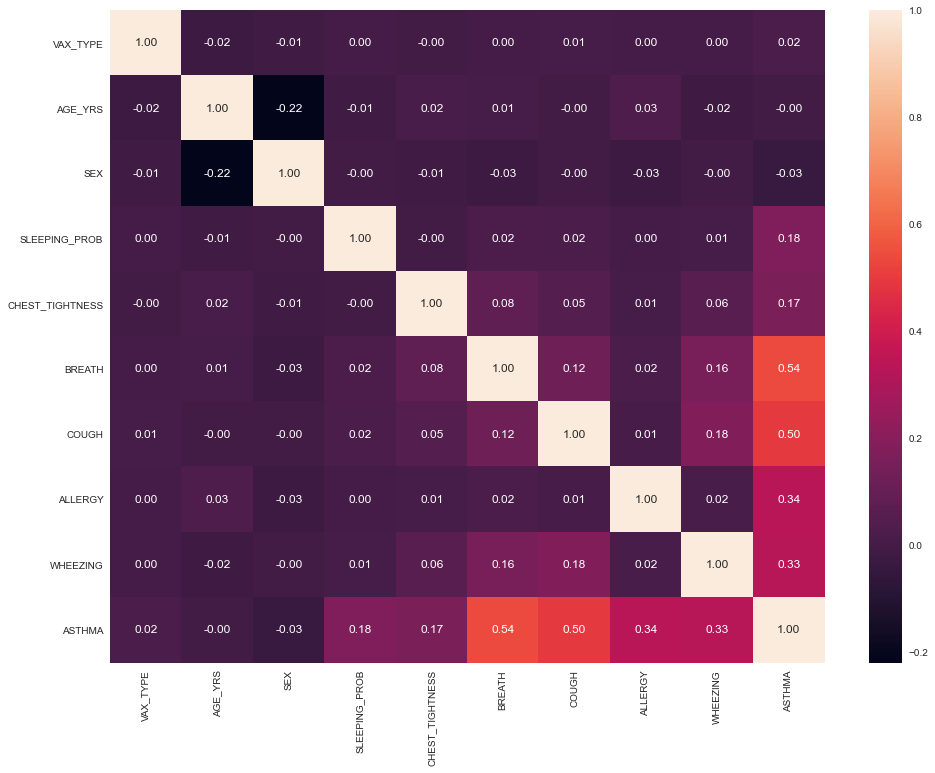

In [27]:
#correlation analysis
plt.figure(figsize=(16,12))
sns.heatmap(data_frame.corr(),annot=True,fmt=".2f")

In [15]:
#looking at data and baises 
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['ASTHMA'] == 1])
num_false = len(data_frame.loc[data_frame['ASTHMA'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  16089 (6.54%)
Number of False cases: 229771 (93.46%)


In [16]:
#from sklearn.model_selection import train_test_split

feature_col_names = ['VAX_TYPE', 'AGE_YRS', 'SEX', 'SLEEPING_PROB', 'CHEST_TIGHTNESS', 'BREATH', 'COUGH', 'ALLERGY','WHEEZING']
predicted_class_names = ['ASTHMA']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)



In [17]:
print(X)

[[ 0.   1.5  1.  ...  0.   0.   0. ]
 [ 1.  28.   0.  ...  1.   0.   1. ]
 [ 2.  53.   0.  ...  0.   0.   0. ]
 ...
 [11.  13.   0.  ...  1.   0.   0. ]
 [ 2.   8.   1.  ...  0.   0.   0. ]
 [15.  10.   0.  ...  0.   0.   0. ]]


In [18]:
#spliting teh data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)



In [39]:
from xgboost import XGBClassifier


In [40]:
#model tuning
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(("XGBoost", XGBClassifier(random_state = 12345)))


In [41]:
results = []
names = []

In [46]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

KNN: 0.948117 (0.000751)
LR: 0.966588 (0.001831)
CART: 0.964826 (0.001447)
RF: 0.967494 (0.001085)
[19:14:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:15:02] WARNING: /Users/travis/build/dmlc/xgboost/sr

In [47]:
from sklearn.model_selection import cross_val_score,KFold,cross_val_score,cross_validate

In [48]:
#visualizing the accuracy, ROC curve and confusion matrics using yellow brick library
def visualize_result(model):
    print("*"*5 + str(model) + "*"*5)
    fig, axes = plt.subplots(2, 2,figsize=(20,10))

    model = model;
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    #print("Accuracy Score :",accuracy_score(y_test,y_pred))
    #print("Matthews_Corr :",matthews_corrcoef(y_test,y_pred))
    #print("F1_Score :",f1_score(y_test,y_pred))
    
    visualgrid = [
        ConfusionMatrix(model, ax=axes[0][0],cmap="YlGn"),
        PrecisionRecallCurve(model,ax=axes[0][1]),  
        #FeatureImportances(model,ax=axes[0][0]),        
        ClassificationReport(model, ax=axes[1][0]),
        ROCAUC(model, ax=axes[1][1])
    ]

    for viz in visualgrid:
        
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()


    plt.show()

*****KNeighborsClassifier()*****


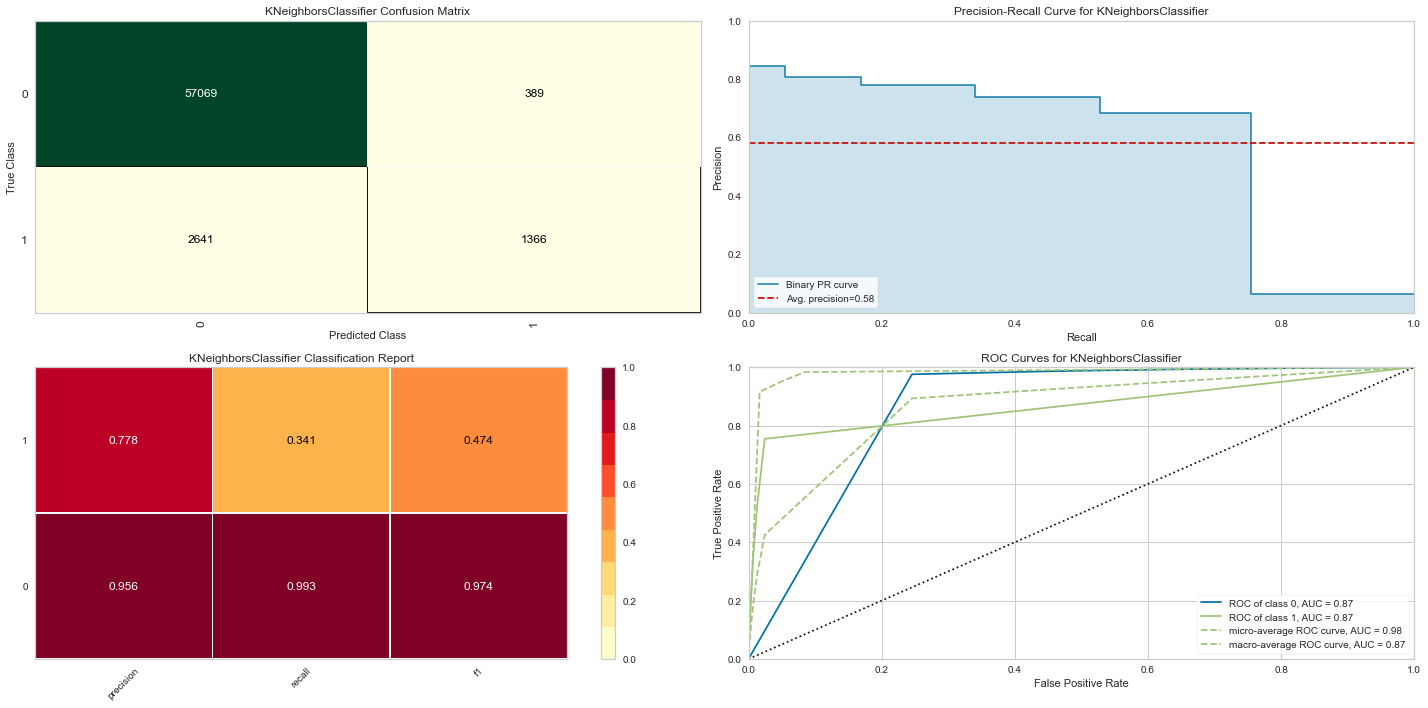

*****LogisticRegression(random_state=12345)*****


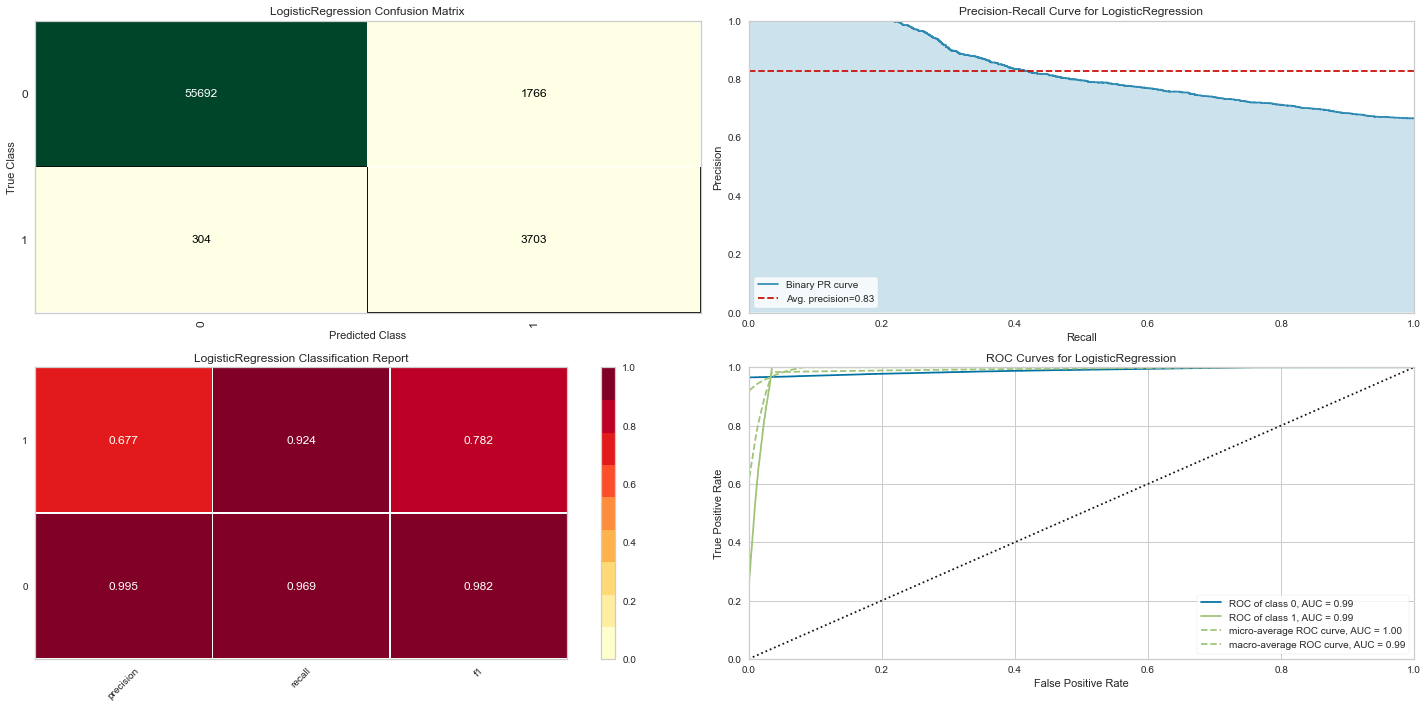

*****DecisionTreeClassifier(random_state=12345)*****


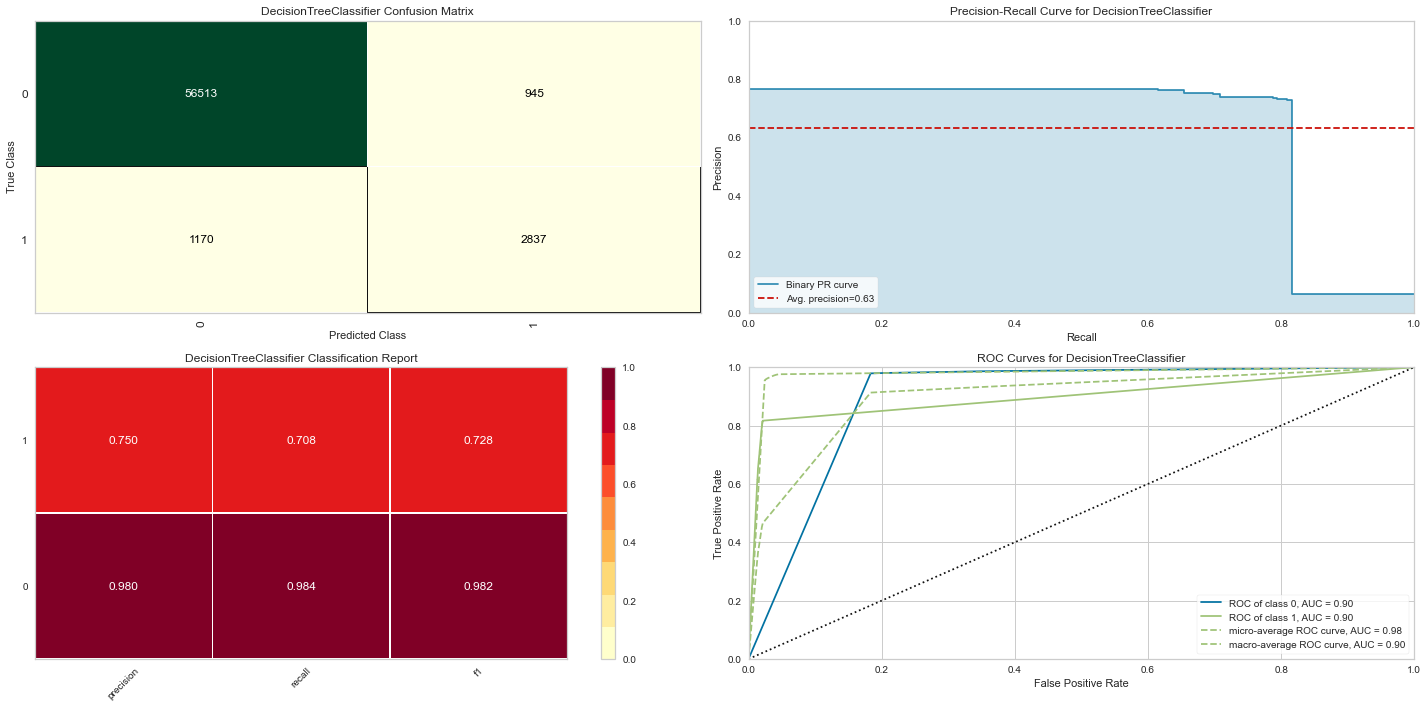

*****RandomForestClassifier(random_state=12345)*****


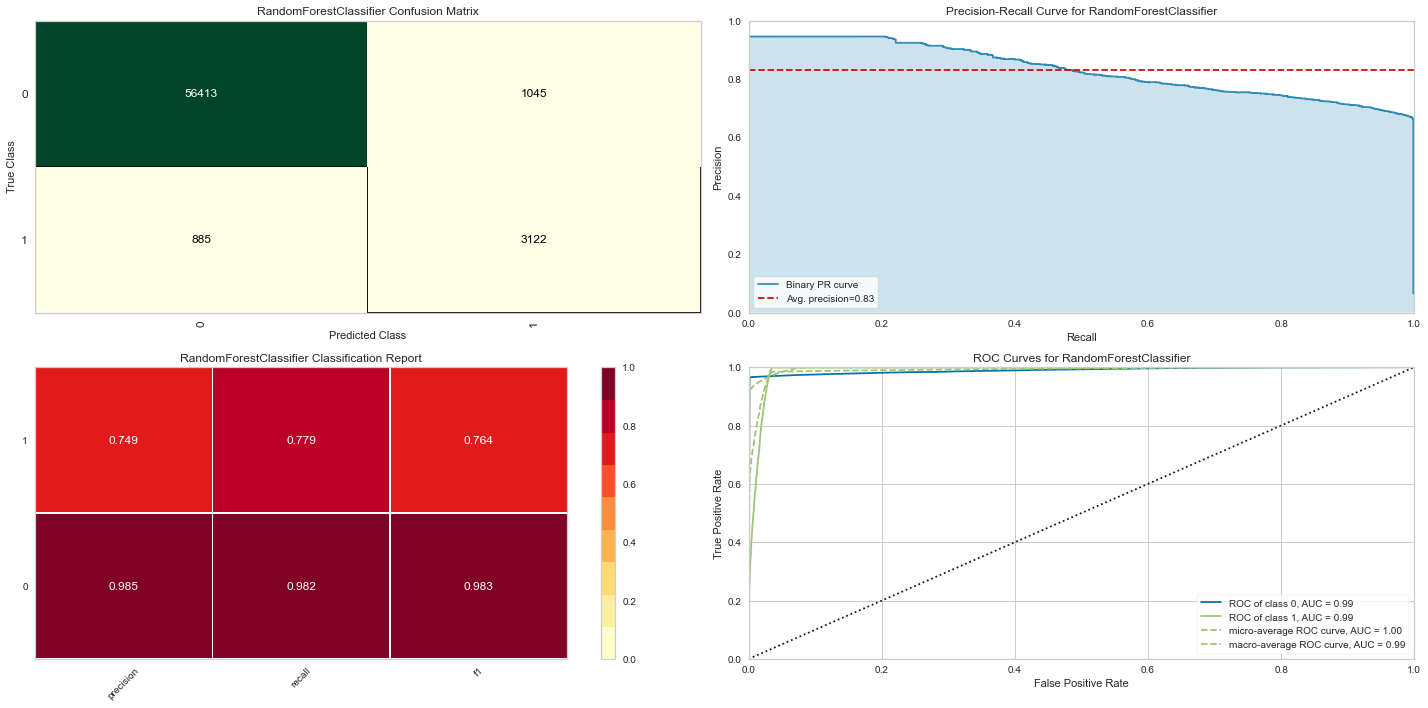

*****XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=12345, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)*****
[19:19:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


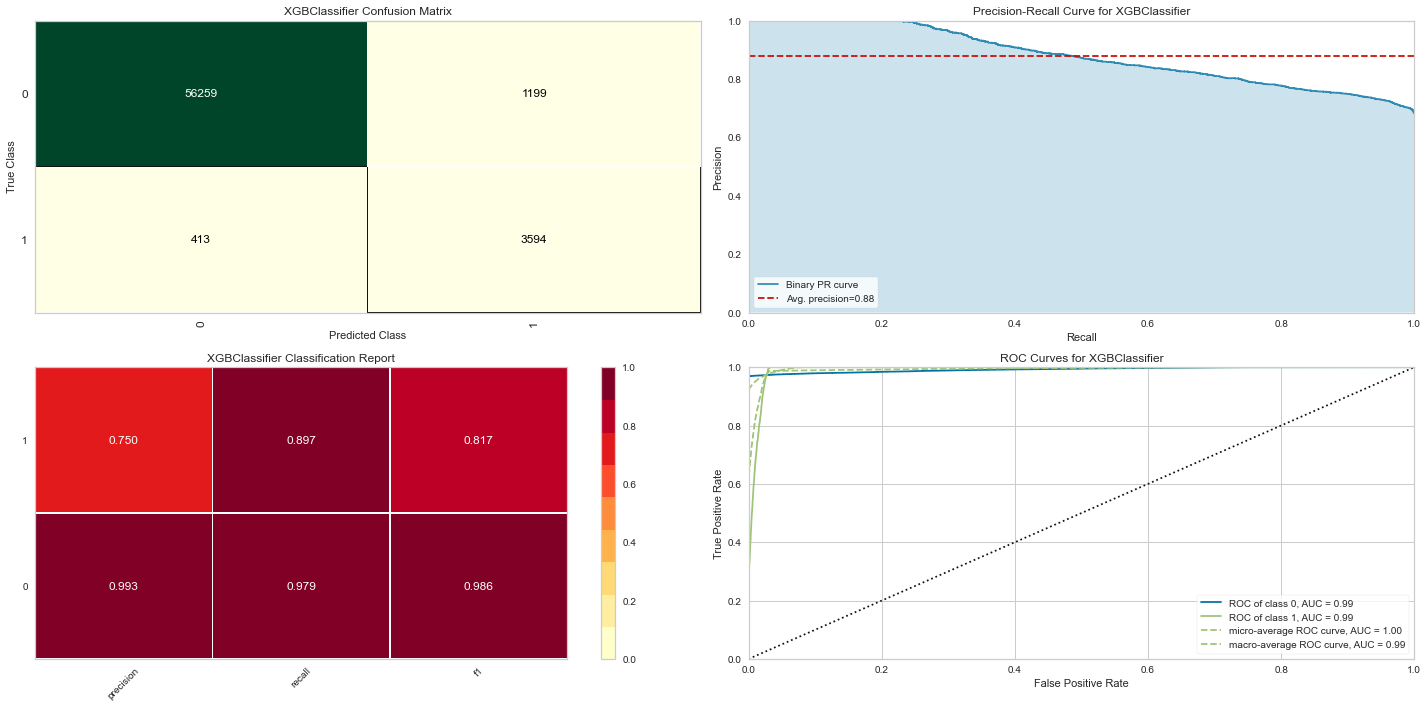

In [49]:
for i in range(len(models)):    
    visualize_result(models[i][1])